# Processing with pIMOS

This parses from raw files to Process Level 0 

Included instruments:
- LISST


In [11]:
import zutils.file as zfile

import os
import matplotlib.pyplot as plt
import datetime
import numpy as np 
import pandas as pd
import glob

import pIMOS.utils.quality_control as pqc
import importlib

import pIMOS.xrwrap.lisst as lisst

# O Drive is //drive.irds.uwa.edu.au/CEME-BBL-001
# pIMOS_export_dir = r'O:\Data\pIMOS\KISSME'

project_root = r'G:\Experiments\rs19'
project_root = r'E:\Experiments\rs19'
archive_dir = os.path.join(project_root, 'archive_FV00') 
dbconfig_file = os.path.join('./', 'database', 'config.txt') 

if not os.path.exists(archive_dir):
    os.mkdir(archive_dir)
    
    
import archive_info_and_utils as ai

db_config = ai.parse_dbconfig(dbconfig_file)
db_data = ai.read_db(dbconfig_file)
db_config
db_data


deployment_metadata = ROWLEY_Instruments.csv

ctd_log = ROWLEY_CTD_Logbook.csv

possible_mooring_dates = ROWLEY_possible_mooring_dates.csv
deployment_metadata = ROWLEY_Instruments.csv

ctd_log = ROWLEY_CTD_Logbook.csv

possible_mooring_dates = ROWLEY_possible_mooring_dates.csv


{'deployment_metadata':     Project StationID Trip Recovered  Longitude  Latitude  Depth TimeZone  \
 0    RS2019      T330       RS19_REC  118.98713 -17.77761  331.0      UTC   
 1    RS2019      T331       RS19_REC  118.98713 -17.77761  331.0      UTC   
 2    RS2019      T332       RS19_REC  118.98713 -17.77761  331.0      UTC   
 3    RS2019      T333       RS19_REC  118.98713 -17.77761  331.0      UTC   
 4    RS2019      T334       RS19_REC  118.98713 -17.77761  331.0      UTC   
 ..      ...       ...            ...        ...       ...    ...      ...   
 106  RS2019      L150       RS19_REC  119.17110 -18.00990  150.0      UTC   
 107  RS2019      L150       RS19_REC  119.17110 -18.00990  150.0      UTC   
 108  RS2019      L150       RS19_REC  119.17110 -18.00990  150.0      UTC   
 109  RS2019      L150       RS19_REC  119.17110 -18.00990  150.0      UTC   
 110     NaN       NaN            NaN        NaN       NaN    NaN      NaN   
 
               Site  InstrumentDepth   

# Loop through all now using the spreadsheet

In [12]:
def row_to_attrs(row):
    
    return {
        'project': row['Project'],
        'trip': row['Trip Recovered'],
        'site': row['Site'],
        'site_station': row['StationID'],
        'nominal_latitude': float(row['Latitude']),
        'nominal_longitude': float(row['Longitude']),
        'nominal_site_depth': float(row['Depth']),
        'nominal_instrument_height_asb': float(row['InstrumentHeight']),
        'nominal_instrument_orientation': row['Orientation'],
        'timezone': row['TimeZone'],
        'instrument_model': row['InstrumentType'],
        'instrument_serial_number': row['SerialNo'],
        }


# Now the LISST
Need code from Will


Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Im a string
Reading info
Reading csv
Converting time
Adding flags
Parsing csv
Initialising accessor.
STORING RAW FILE ATTRIBUTES
Setting attribute "raw_file_name" to "L0910204.csv"
Setting attribute "raw_file_directory" to "D:\Experiments\kissme17\Data\LISST\2031"
{'title': '', 'institution': 'The University of Western Australia', 'institution_division': 'Ocean Dynamics', 'source': '', 'project': '', 'history': '', 'references': '', 'comment': '', 'Conventions': 'CF-1.7', 'trip': '', 'trip_deployed': '', 'site': '', 'site_station': '', 'instrument_make': '', 'instrument_model': '', 'instrument_serial_number': '', 'raw_file_name': 'L0910204.csv', 'raw_file_directory': 'D:\

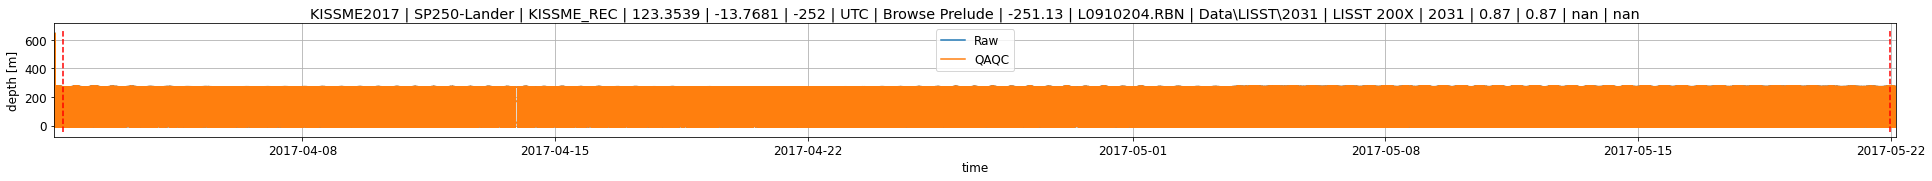

In [3]:

filetypes = ['LISST 200X'];
moorings = db_data['possible_mooring_dates']['Mooring'].values

dfd = r'G:\Experiments\kissme17\Data\FLNTU\Device Files'

for index, row in db_data['deployment_metadata'].iterrows():

    attributes = row_to_attrs(row)
    
    mooring = attributes['site_station']
    project = attributes['project']
    instrument = attributes['instrument_model']
    sn = attributes['instrument_serial_number']
    
    if not project.lower() == 'kissme2017':
        print('Skipping ' + mooring)
        continue
        
    if attributes['instrument_model'] in filetypes:

        filename_wc = os.path.join(project_root, row['FilePath'], row['FileName'])
        
        filenames = glob.glob(filename_wc)
        if len(filenames) == 0:
            print('Skipping ' + row['FileName'])
            continue
                        
        for filename in filenames:
                        
            filename = zfile.swap_extension(filename, '.csv')

            rr, ds = lisst.from_csv(filename)

            rr.update_attributes_with_dict(attributes)

            pqc.pimosInOutWaterQC(rr, mooring, db_data)

            ai.pIMOS_export(rr, archive_dir, instrument)

            fig = ai.plot_temp(rr, db_data, mooring, title=' | '.join([str(i) for i in row.values]), variable='depth',plotraw=True)
            png_path = rr.fullpath_last_export[0:-3] +'.png'
            fig.savefig(png_path, dpi=300)
